In [0]:
!unzip -uq "/content/drive/My Drive/cell_images2.zip" -d "/content/"


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, GlobalAveragePooling2D,Dropout,Dense
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import cv2
import argparse
%matplotlib inline


In [0]:
train_path = '/content/cell_images/Train'
valid_path = '/content/cell_images/Valid'
test_path = '/content/cell_images/Test'

In [0]:
datagen = ImageDataGenerator(rescale=1.0/255)
datagentrain = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,vertical_flip=True,rotation_range=90)

train_batches = datagentrain.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=55)
valid_batches = datagen.flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=100)
test_batches = datagen.flow_from_directory(directory=test_path, target_size=(224,224), batch_size=100)

Found 18368 images belonging to 2 classes.
Found 4594 images belonging to 2 classes.
Found 4596 images belonging to 2 classes.


[1. 0.]


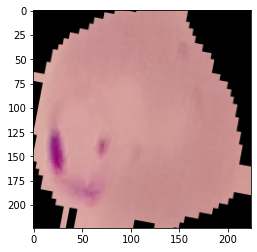

In [0]:
sample=next(train_batches)
img=sample[0][0]
label=sample[1][0]
plt.imshow(img)
print(label)

In [0]:
base_model = keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (224,224,3))


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation= 'softmax')(x)

from keras.models import Model
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [0]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/My Drive/Malar-Ai models/model3-{epoch:03d}.h5',
                                 monitor='val_accuracy',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='auto')

In [0]:
history=model.fit_generator(generator=train_batches,steps_per_epoch=334,epochs=100, callbacks=[checkpoint], validation_data=valid_batches,validation_steps=23,verbose=1)

Epoch 1/100
143/334 [===========>..................] - ETA: 7:12 - loss: 0.8774 - accuracy: 0.6570

KeyboardInterrupt: ignored

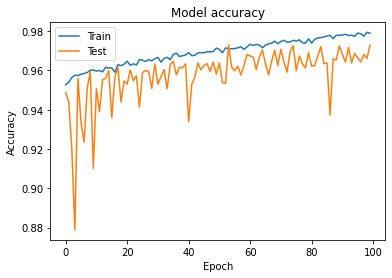

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Acc.jpg")
plt.show()



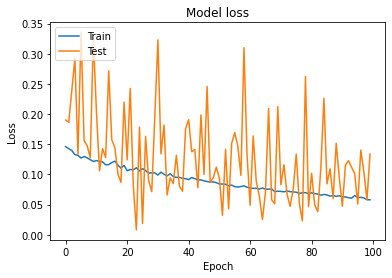

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss.jpg")
plt.show()

In [0]:
model=load_model("/content/drive/My Drive/Malar-Ai models/model3-054.h5")
model.evaluate_generator(test_batches, steps=23)
